## This is the case study for Postmates

Some of the definitions from the case study are as follows:

You are free to chose whichever format you want to present your findings such as excel file, power point, word document, pdf, etc. However, please ensure that your findings are detailed and communication is precise and informative.

1)	What are your basic observations across markets?

outliers like the $10k of burgers, 23 hour wait time, and one san antonio opened up around april 14th for orders

2)	What insights can you develop from this data set?

3)	What are your recommendations?

Some of the definition from the case study are as follows

Description of columns in data set:

market	name of market

job_date_local_time	date of job and local time

customer_price	price customer pays for delivery

courier_price	price paid to courier for delivery

customer_uuid	unique customer id

courier_uuid	unique courier id

job_uuid	unique job id

day_of_week	day of week (Monday = 1, Sunday = 7)

purchase_fee	service fee on purhase price (paid by customer)

rating_by_customer	rating of delivery by customer

purchase_price	price of goods purchased by customer

purchase_tip	tip provided by customer for delivery

credit	credit applied to customer (promotional credits, etc.)

dropoff_km	distance from merchant to customer

category	category

sub_category	sub-category

total_delivery_time	total delivery time in seconds from order place to delivery


# Hypothesis and other notes


Add in weather data like what days were especially hot or rainy for example

filter for duplicate job numbers

search for the most profitable category and subcategory

search for highest rated category

parse the times of the day into different columns military time

Look into drop off distance and ratings and time




In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_m = pd.read_csv('SeniorTechAssoc_Postmates_Case_Study_DS.csv')

In [4]:
df_m.head()

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time
0,Chicago,4/1/15 0:07,5.00,4.0,180DB394-92B1-48FA-A41B-032E2D7705F7,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,7ee723fe-7557-42c0-bdd6-691bac632536,3,1.09,5.0,12.07,0.00,NaN,0.479473,NaN,NaN,1608
1,Chicago,4/1/15 0:12,7.50,6.0,8225C4A7-41F3-41D2-BEAE-03322440CD06,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,9fc78f6f-66e5-4378-81d6-87b93bfed891,3,1.36,5.0,15.09,4.79,NaN,2.130467,Restaurant,Fast Food,1420
2,Chicago,4/1/15 0:16,10.75,8.6,A57C5927-F608-44FA-B466-E5878454BD31,52639991-2e87-4ad6-a903-ede7d00afbc9,1674079d-2a23-4c2f-8aab-ddb274fce53e,3,2.89,5.0,32.09,4.57,NaN,3.985329,Restaurant,Bakery,2698
3,Chicago,4/1/15 0:17,6.00,4.8,6551598E-8771-43A3-97E3-18F1EC473D63,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,17fbcc32-0f03-4af8-b46d-04e8b888e083,3,3.79,5.0,42.09,0.00,NaN,1.291798,Restaurant,Pub,5432
4,Chicago,4/1/15 0:24,8.00,6.4,534ECE59-A2BC-4572-8286-91B25D2A2147,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,e9800b17-936a-4b42-9ed4-cdc8f2c0db77,3,1.65,5.0,18.28,2.00,NaN,2.477835,Restaurant,Pizza,2203


In [5]:
df_m.shape

(30751, 17)

In [6]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 17 columns):
market                 30751 non-null object
job_date_local_time    30751 non-null object
customer_price         30751 non-null float64
courier_price          30751 non-null float64
customer_uuid          30751 non-null object
courier_uuid           30751 non-null object
job_uuid               30751 non-null object
day_of_week            30751 non-null int64
purchase_fee           30751 non-null float64
rating_by_customer     29523 non-null float64
purchase_price         30751 non-null float64
purchase_tip           28654 non-null float64
credit                 10631 non-null float64
dropoff_km             30541 non-null float64
category               27867 non-null object
sub_category           27867 non-null object
total_delivery_time    30751 non-null int64
dtypes: float64(8), int64(2), object(7)
memory usage: 4.0+ MB


In [7]:
df_m.describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time
count,30751.000000,30751.000000,30751.000000,30751.000000,29523.000000,30751.000000,28654.000000,10631.000000,30541.000000,30751.000000
mean,7.732479,6.188814,3.138239,1.727760,4.820479,19.251497,3.307272,5.341924,2.603042,2310.000065
std,3.328567,2.663679,2.016609,6.181386,0.587005,68.716385,4.146394,3.753648,2.698738,1034.572778
min,5.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.010000,0.006644,0.000000
25%,5.250000,4.200000,1.000000,0.710000,5.000000,7.890000,1.090000,2.380000,0.883873,1672.000000
50%,6.500000,5.200000,3.000000,1.220000,5.000000,13.610000,2.590000,5.000000,1.616180,2173.000000
75%,9.000000,7.200000,5.000000,2.110000,5.000000,23.520000,4.437500,7.250000,3.253227,2799.000000
max,48.000000,38.400000,6.000000,1013.310000,5.000000,11259.040000,200.000000,43.010000,26.694607,77375.000000


In [8]:
df_m_pfm = df_m[df_m['purchase_fee']>=50]
df_m_pfm.head(10).sort_values('purchase_fee',ascending=False)

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time
2064,Chicago,4/4/15 15:57,5.25,4.2,338C6B88-BF14-4E26-907C-20622E7C369C,db2baed5-c21c-4b98-8b01-8d886ee167a5,e10ffde6-93ee-4fa5-b610-d3982d9fdeeb,6,1013.31,1.0,11259.04,0.00,NaN,0.939647,Restaurant,Burger,1270
8110,Chicago,4/13/15 11:13,5.00,4.0,A60C0F6B-A2B8-4249-902C-5310FA453542,3b6984bc-1961-4388-947a-d2e2df33228a,0ea049fd-f729-4ea6-b3fc-20750404a7c8,1,123.48,5.0,1372.00,150.05,NaN,0.600500,Shop,Alcohol,3153
3811,Chicago,4/7/15 16:33,5.00,4.0,A60C0F6B-A2B8-4249-902C-5310FA453542,48d904ea-47b1-4357-abb5-dde27b4b631b,08c383c1-f976-4a30-bffb-c3c9a8e8768b,2,81.91,5.0,910.16,149.56,NaN,0.600500,Shop,Alcohol,2750
22038,Chicago,4/30/15 10:25,9.50,7.6,3D4A2F95-D708-49BB-9011-22DFE2901875,10a508ba-146b-4e70-ad8e-11e30cc48a80,8c635e30-39d8-459f-961e-c709d18d2bb2,4,56.83,5.0,631.47,0.00,NaN,3.247853,Shop,Electronics Store,3799
24398,Phoenix,4/8/15 22:16,11.75,9.4,73576E62-7957-4AAB-9E27-021F2A0DD8AE,542d3fd2-e814-47c2-88e5-e91fd24aad03,3d4af37f-304a-4eed-adb2-7b9b5c951337,3,50.33,NaN,559.21,NaN,NaN,10.218471,NaN,NaN,4513


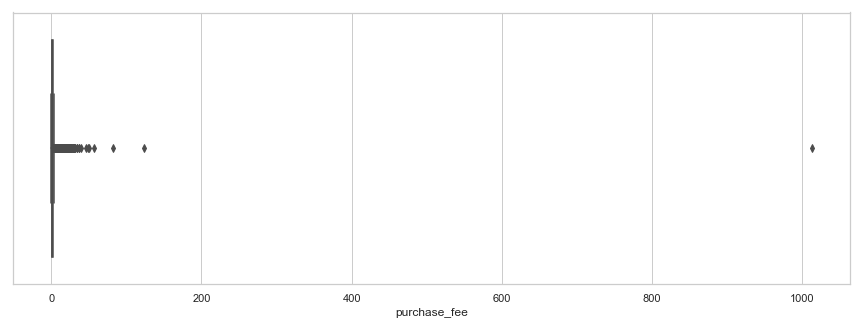

In [9]:
sns.set(style="whitegrid")
plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=df_m["purchase_fee"])

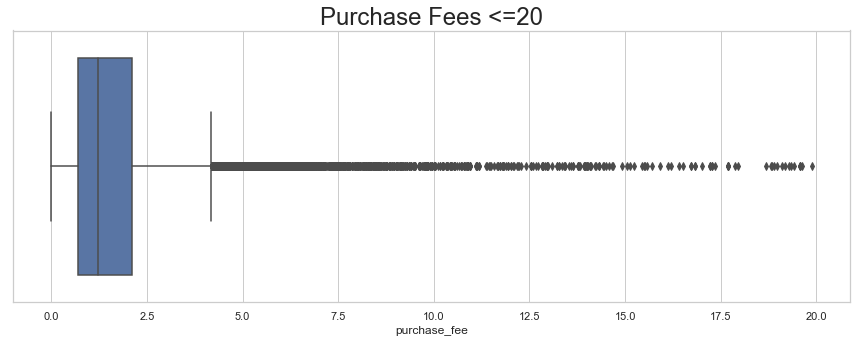

In [10]:
#get ride of superlarge purchases boxchart and create a new dataframe

df_m_c = df_m[df_m['purchase_fee']<=20]
plt.subplots(figsize=(15,5))
#sns.set(font_scale=5)
sns.set(style="whitegrid",font_scale=2)
plt.title("Purchase Fees <=20",fontsize=24)
ax = sns.boxplot(x=df_m_c["purchase_fee"])


In [11]:
df_m_c["purchase_fee"].median()
df_m_c["purchase_fee"].mean()
df_m_c.describe()/df_m.describe() # Shows the difference in details % changes

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time
count,0.998309,0.998309,0.998309,0.998309,0.998273,0.998309,0.998325,0.999718,0.998297,0.998309
mean,0.999609,0.999610,0.999929,0.952431,0.999999,0.952242,0.983100,0.999964,0.999392,0.999183
std,0.998100,0.998103,1.000162,0.279862,0.999909,0.280003,0.872905,1.000116,0.999090,0.998789
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.998733,0.990826,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.997796,0.996139,1.000000,0.999849,0.999540
75%,1.000000,1.000000,1.000000,0.995261,1.000000,0.996599,0.996056,1.000000,0.999533,0.998928
max,1.000000,1.000000,1.000000,0.019629,1.000000,0.019629,1.000000,1.000000,1.000000,1.000000


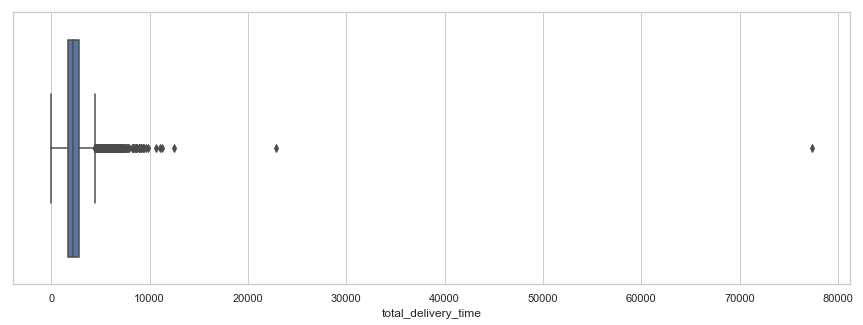

In [12]:
#for time

sns.set(style="whitegrid")
plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=df_m["total_delivery_time"])

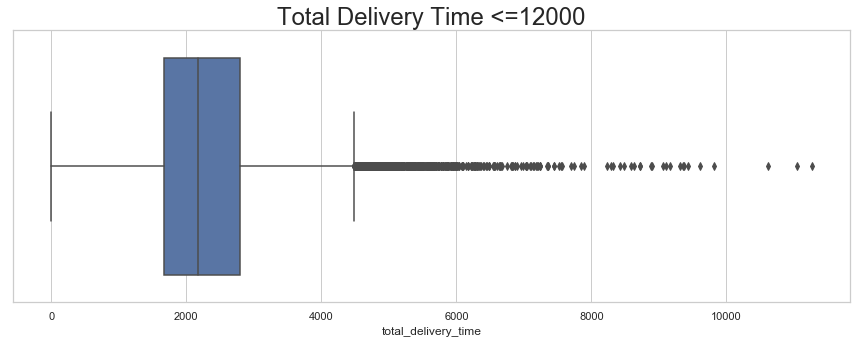

In [13]:
#d2 = d1[d1.a > 1].copy() create a fresh dataframe without outliers
df_m_c2 = df_m_c[df_m_c["total_delivery_time"]<=12000].copy()
plt.subplots(figsize=(15,5))
sns.set(style="whitegrid",font_scale=2)
plt.title("Total Delivery Time <=12000",fontsize=24)
ax = sns.boxplot(x=df_m_c2["total_delivery_time"])

In [14]:
df_m_c2.describe()/df_m.describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time
count,0.998211,0.998211,0.998211,0.998211,0.998205,0.998211,0.998255,0.999624,0.998199,0.998211
mean,0.999626,0.999627,0.999923,0.952428,0.999996,0.952238,0.983071,0.999970,0.999435,0.997691
std,0.998130,0.998132,1.000191,0.279870,0.999940,0.280010,0.872927,1.000162,0.999125,0.900084
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.998733,0.990826,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.997796,0.996139,1.000000,0.999878,0.999540
75%,1.000000,1.000000,1.000000,0.995261,1.000000,0.996599,0.996056,1.000000,0.999677,0.998928
max,1.000000,1.000000,1.000000,0.019629,1.000000,0.019629,1.000000,1.000000,1.000000,0.145641


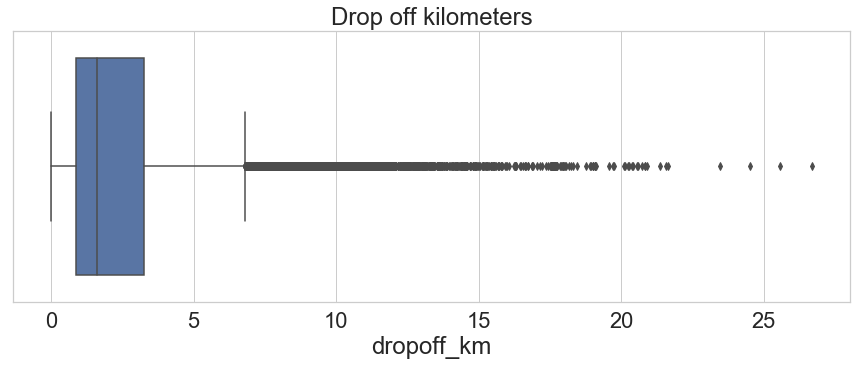

In [15]:
# for distance travelled there isn't anything too outrageous here

plt.subplots(figsize=(15,5))
sns.set(style="whitegrid",font_scale=2)
plt.title("Drop off kilometers",fontsize=24)
ax = sns.boxplot(x=df_m_c2["dropoff_km"])

## Add in time and group people by their repeat transactions

In [16]:
## This is to make the column time for time

#example: job_date_local_time = 4/30/15 21:32
import time
import datetime

pattern = '%m/%d/%y %H:%M'

df_m_c2['unix_time'] = df_m_c2['job_date_local_time'].apply(lambda x: int(time.mktime(time.strptime(x, pattern))))

In [17]:
#df['diff'] = df.sort_values(['id','time']).groupby('id')['time'].diff()

df_m_c2['diff'] = df_m_c2.sort_values(['customer_uuid','unix_time']).groupby('customer_uuid')['unix_time'].diff()

#df1 = df[['a','b']]

df_lag = df_m_c2[['customer_uuid','job_date_local_time','diff']]

#df = df.dropna(subset=['diff'])

df_lag = df_lag.dropna(subset=['diff'])

df_lag.tail().sort_values('customer_uuid')

,customer_uuid,job_date_local_time,diff
30740,161C2D2A-0A9D-48B9-857D-B5530A8B69CC,4/30/15 21:24,173340.0
30746,9410B3FF-FD82-4FEA-9BE5-A505C3E2C916,4/30/15 22:00,85560.0
30750,CB95A335-C135-440B-8D02-2B3E66B7881C,4/30/15 22:35,177120.0
30745,D7DAA386-E615-40A4-A67A-FD1CEEB9A8C3,4/30/15 21:53,522840.0
30749,b5a94a6a-1757-4e48-b0f6-2b6cb66b3d03,4/30/15 22:16,6240.0


In [18]:
#Next step is the find the average time between multiple orders

#group by the customer id and then take the average unix time

df_cust_diff = df_lag.groupby('customer_uuid')["diff"].mean().to_frame()
df_cust_diff.reset_index(level=0, inplace=True)
#df_cust_diff.head()
df_cust_diff['diff'].median() # this is in seconds

392005.0

In [19]:
##df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

df_rep_users = df_lag.groupby('customer_uuid').count().reset_index()

df_rep_u_counts = df_rep_users[['customer_uuid','diff']].rename(columns={'diff':'repeats'}).copy()

df_rep_u_counts['repeats'] = df_rep_u_counts['repeats'] + 1 # this accounts for dropping the Nats 

df_rep_u_counts.head(10)

,customer_uuid,repeats
0,0001CECC-50B2-45F9-BA7F-4F69BA3F3C0C,10
1,00057980-001b-4bb2-ac67-2542d8dc8d0a,6
2,002A1C0A-C171-46E0-AA6B-930B154807CA,2
3,0032C1AD-38DF-4956-9E5D-F780C74CB442,3
4,0035f61c-8e5e-49f2-9eba-10c63f988a1e,4
5,00410264-E57C-446A-B8C8-72EC66F931E7,13
6,00513FD9-E7BD-4EEA-ACC6-6F06A6E4F2C0,16
7,00528307-99C4-440D-B2A3-9E9A8A176742,2
8,005E31D4-199D-405B-9B7D-07A531A66287,6
9,006b0abc-db5d-416d-8d84-7a1e671defd0,3


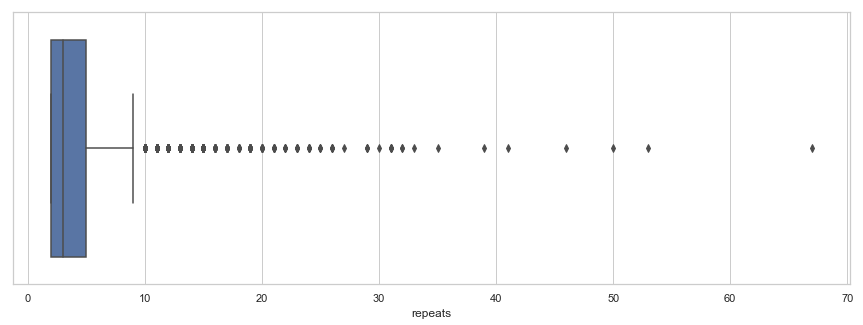

In [20]:
sns.set(style="whitegrid")
plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=df_rep_u_counts['repeats'])

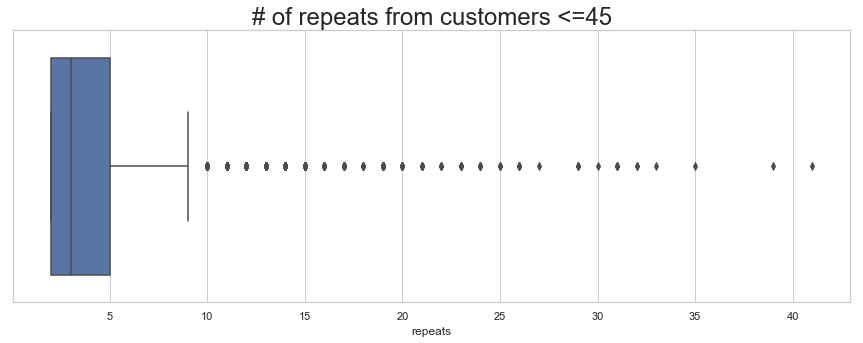

In [21]:
df_rep_u_counts2 = df_rep_u_counts[df_rep_u_counts['repeats']<=45]
plt.subplots(figsize=(15,5))
sns.set(style="whitegrid",font_scale=2)
plt.title("# of repeats from customers <=45",fontsize=24)
ax = sns.boxplot(x=df_rep_u_counts2['repeats'])

In [22]:
#df3 = pd.merge(df1, df2, on='contact id')

df_m_c3 = pd.merge(df_m_c2,df_rep_u_counts, how='left', on='customer_uuid')


In [23]:
df_m_c3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30696 entries, 0 to 30695
Data columns (total 20 columns):
market                 30696 non-null object
job_date_local_time    30696 non-null object
customer_price         30696 non-null float64
courier_price          30696 non-null float64
customer_uuid          30696 non-null object
courier_uuid           30696 non-null object
job_uuid               30696 non-null object
day_of_week            30696 non-null int64
purchase_fee           30696 non-null float64
rating_by_customer     29470 non-null float64
purchase_price         30696 non-null float64
purchase_tip           28604 non-null float64
credit                 10627 non-null float64
dropoff_km             30486 non-null float64
category               27829 non-null object
sub_category           27829 non-null object
total_delivery_time    30696 non-null int64
unix_time              30696 non-null int64
diff                   17072 non-null float64
repeats                22544 n

In [24]:
df_m_c3.head()

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,unix_time,diff,repeats
0,Chicago,4/1/15 0:07,5.00,4.0,180DB394-92B1-48FA-A41B-032E2D7705F7,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,7ee723fe-7557-42c0-bdd6-691bac632536,3,1.09,5.0,12.07,0.00,NaN,0.479473,NaN,NaN,1608,1427872020,NaN,3.0
1,Chicago,4/1/15 0:12,7.50,6.0,8225C4A7-41F3-41D2-BEAE-03322440CD06,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,9fc78f6f-66e5-4378-81d6-87b93bfed891,3,1.36,5.0,15.09,4.79,NaN,2.130467,Restaurant,Fast Food,1420,1427872320,NaN,5.0
2,Chicago,4/1/15 0:16,10.75,8.6,A57C5927-F608-44FA-B466-E5878454BD31,52639991-2e87-4ad6-a903-ede7d00afbc9,1674079d-2a23-4c2f-8aab-ddb274fce53e,3,2.89,5.0,32.09,4.57,NaN,3.985329,Restaurant,Bakery,2698,1427872560,NaN,5.0
3,Chicago,4/1/15 0:17,6.00,4.8,6551598E-8771-43A3-97E3-18F1EC473D63,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,17fbcc32-0f03-4af8-b46d-04e8b888e083,3,3.79,5.0,42.09,0.00,NaN,1.291798,Restaurant,Pub,5432,1427872620,NaN,23.0
4,Chicago,4/1/15 0:24,8.00,6.4,534ECE59-A2BC-4572-8286-91B25D2A2147,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,e9800b17-936a-4b42-9ed4-cdc8f2c0db77,3,1.65,5.0,18.28,2.00,NaN,2.477835,Restaurant,Pizza,2203,1427873040,NaN,2.0


In [25]:
#values = {'repeats': 1}
df_m_c3 = df_m_c3.fillna(value={'repeats': 1})

In [26]:
df_m_c3.describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time,unix_time,diff,repeats
count,30696.000000,30696.000000,30696.000000,30696.000000,29470.000000,30696.000000,28604.000000,10627.000000,30486.000000,30696.000000,3.069600e+04,1.707200e+04,30696.000000
mean,7.729589,6.186507,3.137998,1.645567,4.820461,18.332016,3.251283,5.341764,2.601571,2304.666862,1.429305e+09,3.529113e+05,5.855551
std,3.322341,2.658703,2.016994,1.729983,0.586970,19.241285,3.619499,3.754258,2.696376,931.202312,7.375915e+05,3.964909e+05,7.415861
min,5.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.010000,0.006644,0.000000,1.427872e+09,0.000000e+00,1.000000
25%,5.250000,4.200000,1.000000,0.710000,5.000000,7.880000,1.080000,2.380000,0.883873,1672.000000,1.428714e+09,8.334000e+04,1.000000
50%,6.500000,5.200000,3.000000,1.220000,5.000000,13.580000,2.580000,5.000000,1.615982,2172.000000,1.429383e+09,1.887300e+05,3.000000
75%,9.000000,7.200000,5.000000,2.100000,5.000000,23.440000,4.420000,7.250000,3.252175,2796.000000,1.429940e+09,5.088750e+05,7.000000
max,48.000000,38.400000,6.000000,19.890000,5.000000,221.000000,200.000000,43.010000,26.694607,11269.000000,1.430463e+09,2.549880e+06,67.000000


In [27]:
df_m_c3.head().T

,0,1,2,3,4
market,Chicago,Chicago,Chicago,Chicago,Chicago
job_date_local_time,4/1/15 0:07,4/1/15 0:12,4/1/15 0:16,4/1/15 0:17,4/1/15 0:24
customer_price,5,7.5,10.75,6,8
courier_price,4,6,8.6,4.8,6.4
customer_uuid,180DB394-92B1-48FA-A41B-032E2D7705F7,8225C4A7-41F3-41D2-BEAE-03322440CD06,A57C5927-F608-44FA-B466-E5878454BD31,6551598E-8771-43A3-97E3-18F1EC473D63,534ECE59-A2BC-4572-8286-91B25D2A2147
courier_uuid,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,52639991-2e87-4ad6-a903-ede7d00afbc9,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0
job_uuid,7ee723fe-7557-42c0-bdd6-691bac632536,9fc78f6f-66e5-4378-81d6-87b93bfed891,1674079d-2a23-4c2f-8aab-ddb274fce53e,17fbcc32-0f03-4af8-b46d-04e8b888e083,e9800b17-936a-4b42-9ed4-cdc8f2c0db77
day_of_week,3,3,3,3,3
purchase_fee,1.09,1.36,2.89,3.79,1.65
rating_by_customer,5,5,5,5,5


In [28]:
df_m_reps = df_m_c3[df_m_c3['repeats']>=45]
df_m_reps.head().sort_values('unix_time')

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,unix_time,diff,repeats
25,Chicago,4/1/15 8:52,5.00,4.0,CA98DC07-0B26-4421-B617-B45E2ADBDD9C,89164dc8-561c-4fc5-a242-273894a78c0c,38b39fb3-d409-4a80-a6a7-e4888515ea26,3,0.47,5.0,5.26,1.61,NaN,0.281081,Restaurant,Restaurant,2341,1427903520,NaN,67.0
26,Chicago,4/1/15 9:02,6.75,5.4,CA98DC07-0B26-4421-B617-B45E2ADBDD9C,b55e2ac1-aa60-4fed-bfff-35b602d79e94,dda08ec9-359b-4a62-abda-b8a1d84b96e1,3,0.20,5.0,2.21,0.92,NaN,1.697646,Restaurant,Fast Food,1931,1427904120,600.0,67.0
271,Chicago,4/1/15 18:51,15.25,12.2,900930af-49ce-4233-9f33-4110feda4190,c93872cc-d08d-4e64-ac86-c4cf8b6a45fd,a0e49db5-73af-40c2-9749-14cb3a81020a,3,7.61,5.0,84.53,10.74,10.26,6.399514,Restaurant,Vietnamese,3417,1427939460,NaN,50.0
451,Chicago,4/1/15 22:31,6.75,5.4,CA98DC07-0B26-4421-B617-B45E2ADBDD9C,e91ad427-dd7a-4d63-8b87-b430adfd234a,fad4c793-658f-4791-8caa-3afe06de7557,3,1.03,5.0,11.48,2.89,NaN,1.697646,Restaurant,Fast Food,2265,1427952660,48540.0,67.0
512,Chicago,4/2/15 8:45,5.00,4.0,CA98DC07-0B26-4421-B617-B45E2ADBDD9C,c760d4fe-1e1b-4956-ae05-e41c7f29b02e,9351e1c2-e4b3-4c3d-9022-464dc818af72,4,0.47,5.0,5.26,1.61,NaN,0.281081,Restaurant,Restaurant,1876,1427989500,36840.0,67.0


In [29]:
df_m_reps.describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time,unix_time,diff,repeats
count,216.000000,216.000000,216.000000,216.000000,214.000000,216.000000,209.000000,28.000000,216.000000,216.000000,2.160000e+02,212.000000,216.000000
mean,8.081019,6.464815,3.217593,1.883889,4.995327,20.933796,5.214928,5.314643,3.100619,2426.740741,1.429172e+09,40487.547170,55.157407
std,3.175365,2.540292,2.055931,2.624125,0.068359,29.157032,6.041737,2.378586,3.028265,1074.952857,6.254250e+05,44692.824743,8.305405
min,5.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.510000,0.281081,0.000000,1.427904e+09,0.000000,46.000000
25%,5.500000,4.400000,1.750000,0.200000,5.000000,2.210000,1.250000,3.445000,1.016684,1672.500000,1.428718e+09,4335.000000,50.000000
50%,6.750000,5.400000,3.000000,0.710000,5.000000,7.885000,2.000000,5.060000,1.697646,2290.000000,1.429150e+09,26400.000000,53.000000
75%,10.000000,8.000000,5.000000,2.537500,5.000000,28.180000,8.440000,7.152500,3.990606,3017.750000,1.429728e+09,61185.000000,67.000000
max,20.000000,16.000000,6.000000,14.020000,5.000000,155.810000,35.070000,10.260000,18.052872,7108.000000,1.430447e+09,290460.000000,67.000000


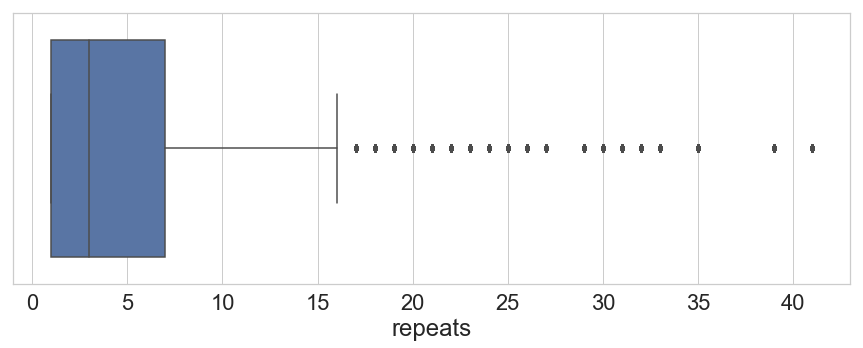

In [30]:
df_m_c4 = df_m_c3[df_m_c3['repeats']<=45].copy().reset_index()
plt.subplots(figsize=(15,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_m_c4['repeats'])

In [31]:
#gapminder_ocean.drop(['pop'], axis=1)

df_m_c4 = df_m_c4.drop(['index'],axis =1)

df_m_c4.describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time,unix_time,diff,repeats
count,30480.000000,30480.000000,30480.000000,30480.000000,29256.000000,30480.000000,28395.000000,10599.000000,30270.000000,30480.000000,3.048000e+04,1.686000e+04,30480.000000
mean,7.727099,6.184535,3.137434,1.643878,4.819182,18.313578,3.236830,5.341836,2.598010,2303.801772,1.429306e+09,3.568398e+05,5.506168
std,3.323277,2.659460,2.016739,1.721938,0.588893,19.152170,3.591826,3.757296,2.693584,930.067500,7.382493e+05,3.973840e+05,6.127828
min,5.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.010000,0.006644,0.000000,1.427872e+09,0.000000e+00,1.000000
25%,5.250000,4.200000,1.000000,0.710000,5.000000,7.960000,1.080000,2.310000,0.882655,1672.000000,1.428714e+09,8.454000e+04,1.000000
50%,6.500000,5.200000,3.000000,1.220000,5.000000,13.620000,2.590000,5.000000,1.611503,2171.000000,1.429384e+09,1.937700e+05,3.000000
75%,9.000000,7.200000,5.000000,2.100000,5.000000,23.420000,4.410000,7.250000,3.245182,2794.000000,1.429941e+09,5.112750e+05,7.000000
max,48.000000,38.400000,6.000000,19.890000,5.000000,221.000000,200.000000,43.010000,26.694607,11269.000000,1.430463e+09,2.549880e+06,41.000000


In [32]:
## Another repeat column for potentially habitual Postmaters "Once a week"

In [33]:
#df['Price'] = [1500 if x =='Music' else 800 for x in df['Event']]
df_m_c4['Weekly_orderer'] = [1 if x >=4 else 0 for x in df_m_c4['repeats']]

In [34]:
df_m_c4.head()

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,...,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,unix_time,diff,repeats,Weekly_orderer
0,Chicago,4/1/15 0:07,5.00,4.0,180DB394-92B1-48FA-A41B-032E2D7705F7,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,7ee723fe-7557-42c0-bdd6-691bac632536,3,1.09,5.0,...,0.00,NaN,0.479473,NaN,NaN,1608,1427872020,NaN,3.0,0
1,Chicago,4/1/15 0:12,7.50,6.0,8225C4A7-41F3-41D2-BEAE-03322440CD06,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,9fc78f6f-66e5-4378-81d6-87b93bfed891,3,1.36,5.0,...,4.79,NaN,2.130467,Restaurant,Fast Food,1420,1427872320,NaN,5.0,1
2,Chicago,4/1/15 0:16,10.75,8.6,A57C5927-F608-44FA-B466-E5878454BD31,52639991-2e87-4ad6-a903-ede7d00afbc9,1674079d-2a23-4c2f-8aab-ddb274fce53e,3,2.89,5.0,...,4.57,NaN,3.985329,Restaurant,Bakery,2698,1427872560,NaN,5.0,1
3,Chicago,4/1/15 0:17,6.00,4.8,6551598E-8771-43A3-97E3-18F1EC473D63,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,17fbcc32-0f03-4af8-b46d-04e8b888e083,3,3.79,5.0,...,0.00,NaN,1.291798,Restaurant,Pub,5432,1427872620,NaN,23.0,1
4,Chicago,4/1/15 0:24,8.00,6.4,534ECE59-A2BC-4572-8286-91B25D2A2147,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,e9800b17-936a-4b42-9ed4-cdc8f2c0db77,3,1.65,5.0,...,2.00,NaN,2.477835,Restaurant,Pizza,2203,1427873040,NaN,2.0,0


### Add in time and date stuff

In [35]:
##df['new_time'] = [d.time() for d in df['my_timestamp']]
import datetime

##if date is needed
##df['Dates'] = pd.to_datetime(df['date']).dt.date

#df_m_cat['Time'] = pd.to_datetime(df_m_cat['job_date_local_time']).dt.time
df_m_c4['Hour'] = pd.to_datetime(df_m_c4['job_date_local_time']).dt.hour
df_m_c4['Date'] = pd.to_datetime(df_m_c4['job_date_local_time']).dt.date

In [36]:
#create name day of week here

df_m_c4['Date'] = pd.to_datetime(df_m_c4['Date'], errors='coerce')
df_m_c4['name_day_of_week'] = df_m_c4['Date'].dt.day_name()

# super basic data monitoring

In [37]:
df_m_pfz = df_m_c4[df_m_c4['purchase_price']==0]
df_m_pfz.groupby('market')['job_uuid'].count()

market
Chicago        2650
Phoenix        1033
San Antonio     373
Name: job_uuid, dtype: int64

In [38]:
df_m_pfz.head()

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,...,category,sub_category,total_delivery_time,unix_time,diff,repeats,Weekly_orderer,Hour,Date,name_day_of_week
10,Chicago,4/1/15 1:50,7.00,5.6,2A17CB99-7141-4A7B-A3AF-E869AE725972,52639991-2e87-4ad6-a903-ede7d00afbc9,dc476dac-ec6c-4ed9-b0c8-c7460af5e5ee,3,0.0,5.0,...,NaN,NaN,3457,1427878200,NaN,2.0,0,1,2015-04-01,Wednesday
100,Chicago,4/1/15 12:31,26.00,20.8,032c32d8-b9af-478e-b35c-27e06e992513,9bff6dc3-96ff-4287-b305-a2cc0e10a732,7643892c-8020-45c9-a33f-55d9e4279416,3,0.0,5.0,...,Restaurant,Fast Food,3452,1427916660,NaN,1.0,0,12,2015-04-01,Wednesday
142,Chicago,4/1/15 14:56,16.00,12.8,F98DC89A-1F23-4EDA-BEA9-D32DC38452F6,7f57ab18-9160-40b4-afe1-51a0a0306f4e,42f3dd69-f080-4a44-82c8-1139a9bbef59,3,0.0,5.0,...,NaN,NaN,3377,1427925360,NaN,1.0,0,14,2015-04-01,Wednesday
148,Chicago,4/1/15 15:15,12.00,9.6,19b507ce-c3b0-445c-a927-86f1600447d9,96949479-e05d-4abe-be53-9901ead3a86f,8d4a4403-3471-464f-a4dc-d8c4a402d5e3,3,0.0,5.0,...,Restaurant,Southern,944,1427926500,NaN,27.0,1,15,2015-04-01,Wednesday
206,Chicago,4/1/15 17:36,14.75,11.8,567d5985-a643-4c7a-9595-6a081a489e90,79bc18c8-3315-4ea6-88fc-e3f416602039,6849eb28-1a93-4e4b-a6b1-47ccf75a1c8a,3,0.0,5.0,...,Restaurant,BBQ,284,1427934960,NaN,10.0,1,17,2015-04-01,Wednesday


In [39]:
df_m_c4.groupby('market')['job_uuid'].count()

market
Chicago        22626
Phoenix         6611
San Antonio     1243
Name: job_uuid, dtype: int64

In [40]:
##state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
df_m_p=df_m_c4.groupby('market')['job_uuid'].count()

df_m_p/df_m_c4['job_uuid'].count()

market
Chicago        0.742323
Phoenix        0.216896
San Antonio    0.040781
Name: job_uuid, dtype: float64

In [41]:
df_m_c4.groupby('market')['customer_uuid'].nunique()
#wow there aren't as many customers as I thought

market
Chicago        9928
Phoenix        3077
San Antonio     620
Name: customer_uuid, dtype: int64

In [42]:
df_m_c4.groupby('market')['customer_uuid'].nunique()/df_m_c4['customer_uuid'].nunique()

#it looks like everyone does at least two of the orders

market
Chicago        0.728928
Phoenix        0.225918
San Antonio    0.045521
Name: customer_uuid, dtype: float64

In [43]:
df_m_c4.groupby('market')['purchase_fee'].sum()

market
Chicago        40512.99
Phoenix         8700.57
San Antonio      891.85
Name: purchase_fee, dtype: float64

In [44]:
#mean profit on each delivery scalability is better
df_m_c4.groupby('market')['purchase_fee'].mean()

market
Chicago        1.790550
Phoenix        1.316075
San Antonio    0.717498
Name: purchase_fee, dtype: float64

In [45]:
#number of unique couriers in the market
df_m_c4.groupby('market')['courier_uuid'].nunique()

market
Chicago        674
Phoenix        257
San Antonio     83
Name: courier_uuid, dtype: int64

In [46]:
#create a mask of nan rows 
nan_rows = df_m_c4[df_m_c4['category'].isnull()]

In [47]:
#number of nans by market for cleanup analysis
nan_rows.groupby('market')['job_uuid'].count()

market
Chicago        1925
Phoenix         868
San Antonio      49
Name: job_uuid, dtype: int64

In [48]:
#custom column full profit
df_m_c4['full_profit'] = df_m_c4['customer_price']-df_m_c4['courier_price'] + df_m_c4['purchase_fee']

In [49]:
#custom column deliver speed
df_m_c4['deliverer_speed'] = df_m_c4['dropoff_km']/df_m_c4['total_delivery_time']

In [50]:
df_m_c4.groupby('market')['full_profit'].sum()

market
Chicago        74805.44
Phoenix        19278.17
San Antonio     3039.15
Name: full_profit, dtype: float64

In [51]:
df_m_c4.groupby('market')['full_profit'].median()

market
Chicago        2.78
Phoenix        2.53
San Antonio    2.17
Name: full_profit, dtype: float64

In [52]:
df_lag2 = df_m_c4.dropna(subset=['diff'])
df_lag2['diff'].mean()
#df_lag2.describe()

356839.7864768683

In [53]:
df_lag2.groupby('market')['diff'].mean()

market
Chicago        366711.983308
Phoenix        346374.095023
San Antonio    214977.688604
Name: diff, dtype: float64

In [54]:
#unix time for seeing the min and max
df_m_c4.sort_values('unix_time',ascending=False).head()

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,...,total_delivery_time,unix_time,diff,repeats,Weekly_orderer,Hour,Date,name_day_of_week,full_profit,deliverer_speed
29236,Phoenix,4/30/15 23:58,6.50,5.2,f610589b-5e01-4078-9626-ba349a460a00,7f99aa58-c334-40b8-b15e-ab9412263058,f704874f-9bc2-4ac4-b9af-30a8f7cfda7a,4,1.09,5.0,...,1863,1430463480,NaN,1.0,0,23,2015-04-30,Thursday,2.39,0.001254
22625,Chicago,4/30/15 23:58,6.75,5.4,aa41a0ac-d24e-4de5-a87f-fe456883cb01,25a301ef-d82f-4c4d-b31d-2363d53496b6,2e1f97a1-427c-47ee-9322-855d191c8e80,4,0.84,5.0,...,1472,1430463480,198780.0,8.0,1,23,2015-04-30,Thursday,2.19,0.001172
22624,Chicago,4/30/15 23:57,6.25,5.0,1B305961-F919-43D3-8924-2DE24B6F30BE,1bd0dc10-0bf1-4010-ad21-81f6e929f9df,5eacf6a1-791c-4974-9db3-cfd485d2934c,4,1.58,5.0,...,2048,1430463420,274380.0,11.0,1,23,2015-04-30,Thursday,2.83,0.000713
22623,Chicago,4/30/15 23:55,6.00,4.8,6A09C8BE-5111-4B0F-8DCE-6E119D37C61B,79bc18c8-3315-4ea6-88fc-e3f416602039,315284a6-15aa-4cee-b650-a6c963cf9209,4,0.90,5.0,...,1952,1430463300,273540.0,3.0,0,23,2015-04-30,Thursday,2.10,0.000691
22622,Chicago,4/30/15 23:50,6.75,5.4,516238c4-f349-402e-94c5-7fd3ffe5106d,115dc214-52db-4c43-a133-918ee505779b,f42e6beb-6779-42a5-aa9d-b4ce7e4f22c9,4,1.47,5.0,...,3240,1430463000,277140.0,6.0,1,23,2015-04-30,Thursday,2.82,0.000529


In [55]:
#custom column

#df_m_c2['service_fee_%'] = df_m_c2['purchase_fee']/df_m_c2['purchase_price']

### Service_fee is 9% of the purchase_price

In [56]:
df_m_c4.head()

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,...,total_delivery_time,unix_time,diff,repeats,Weekly_orderer,Hour,Date,name_day_of_week,full_profit,deliverer_speed
0,Chicago,4/1/15 0:07,5.00,4.0,180DB394-92B1-48FA-A41B-032E2D7705F7,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,7ee723fe-7557-42c0-bdd6-691bac632536,3,1.09,5.0,...,1608,1427872020,NaN,3.0,0,0,2015-04-01,Wednesday,2.09,0.000298
1,Chicago,4/1/15 0:12,7.50,6.0,8225C4A7-41F3-41D2-BEAE-03322440CD06,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,9fc78f6f-66e5-4378-81d6-87b93bfed891,3,1.36,5.0,...,1420,1427872320,NaN,5.0,1,0,2015-04-01,Wednesday,2.86,0.001500
2,Chicago,4/1/15 0:16,10.75,8.6,A57C5927-F608-44FA-B466-E5878454BD31,52639991-2e87-4ad6-a903-ede7d00afbc9,1674079d-2a23-4c2f-8aab-ddb274fce53e,3,2.89,5.0,...,2698,1427872560,NaN,5.0,1,0,2015-04-01,Wednesday,5.04,0.001477
3,Chicago,4/1/15 0:17,6.00,4.8,6551598E-8771-43A3-97E3-18F1EC473D63,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,17fbcc32-0f03-4af8-b46d-04e8b888e083,3,3.79,5.0,...,5432,1427872620,NaN,23.0,1,0,2015-04-01,Wednesday,4.99,0.000238
4,Chicago,4/1/15 0:24,8.00,6.4,534ECE59-A2BC-4572-8286-91B25D2A2147,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,e9800b17-936a-4b42-9ed4-cdc8f2c0db77,3,1.65,5.0,...,2203,1427873040,NaN,2.0,0,0,2015-04-01,Wednesday,3.25,0.001125


In [57]:
df_m_cat = pd.get_dummies(df_m_c4, columns=['market'])

In [58]:
df_m_cat.head().T

,0,1,2,3,4
job_date_local_time,4/1/15 0:07,4/1/15 0:12,4/1/15 0:16,4/1/15 0:17,4/1/15 0:24
customer_price,5,7.5,10.75,6,8
courier_price,4,6,8.6,4.8,6.4
customer_uuid,180DB394-92B1-48FA-A41B-032E2D7705F7,8225C4A7-41F3-41D2-BEAE-03322440CD06,A57C5927-F608-44FA-B466-E5878454BD31,6551598E-8771-43A3-97E3-18F1EC473D63,534ECE59-A2BC-4572-8286-91B25D2A2147
courier_uuid,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,52639991-2e87-4ad6-a903-ede7d00afbc9,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0
job_uuid,7ee723fe-7557-42c0-bdd6-691bac632536,9fc78f6f-66e5-4378-81d6-87b93bfed891,1674079d-2a23-4c2f-8aab-ddb274fce53e,17fbcc32-0f03-4af8-b46d-04e8b888e083,e9800b17-936a-4b42-9ed4-cdc8f2c0db77
day_of_week,3,3,3,3,3
purchase_fee,1.09,1.36,2.89,3.79,1.65
rating_by_customer,5,5,5,5,5
purchase_price,12.07,15.09,32.09,42.09,18.28


In [59]:
df_m_cat_corr = df_m_cat.drop(['day_of_week','unix_time','diff','Hour','repeats'],axis =1)

<Figure size 432x288 with 0 Axes>

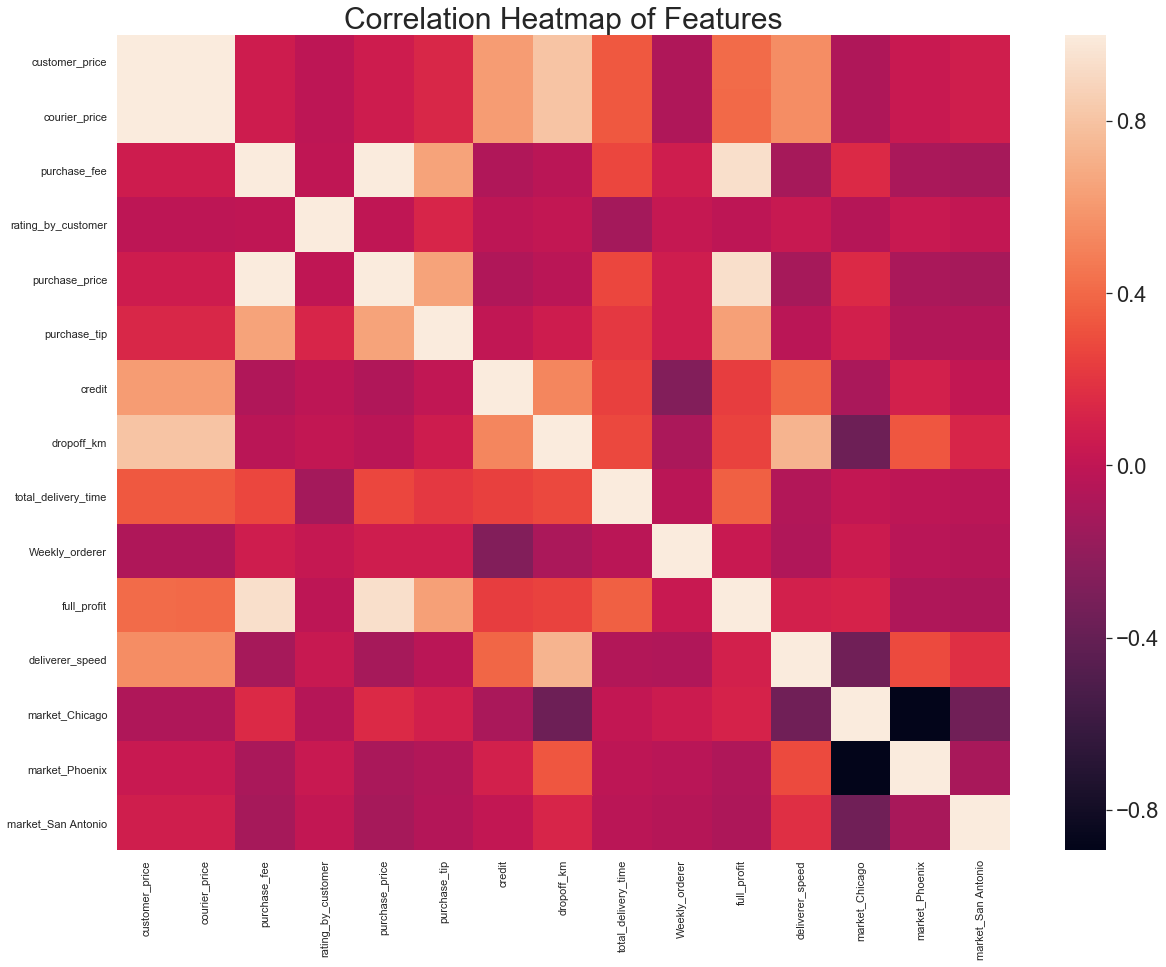

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.tight_layout()
plt.subplots(figsize=(20,15))
sns.set(font_scale=2)
plt.title("Correlation Heatmap of Features",fontsize=30)
sns.heatmap(df_m_cat_corr.corr())

###

### Hypothesis from the heatmap:

__Customer_price__ and __courier_price__ is related to __dropoff_km__, __credit__, 

__Day_of_week__ should be a one hot encoder or dummy variable

__Purchase_Fee__ is really related to __Full_profit__, __Purchase_price__

__Rating_by_customer__ is correlated to the __total_delivery_time__

__Purchase_tip__ is correlated to __category_special__ and __purchase_price__

__credit__ is related to __category_special__ , __drop_off__, and __customer_price__ and __courier_price__

__dropoff_km__ is correlated to __market__ distance, 

__full_profit__ is correlated to __category_special__ 



Chicago has a correlation between the customer price and the courier price

Resturants have the most correlation 

## Notes on what to do next

Try dropping the Nan values for the transactions with missing categories

compare the day of the week to average purchase price


much later use data science models to predict the missing purchase prices, and missing categories

#w['female'] = w['female'].map({'female': 1, 'male': 0}) how to remap values

In [61]:
#create separate dataframe that has a lot of columns to find correlationn for time. SPOILER THERE ISN'T MUCH
#df_m_cat2 = pd.get_dummies(df_m_cat, columns=['Hour','name_day_of_week'])
#df_m_cat2 = pd.get_dummies(df_m_c4, columns=['name_day_of_week'])
df_m_cat2 = pd.get_dummies(df_m_c4, columns=['category','Hour','name_day_of_week'])

<Figure size 432x288 with 0 Axes>

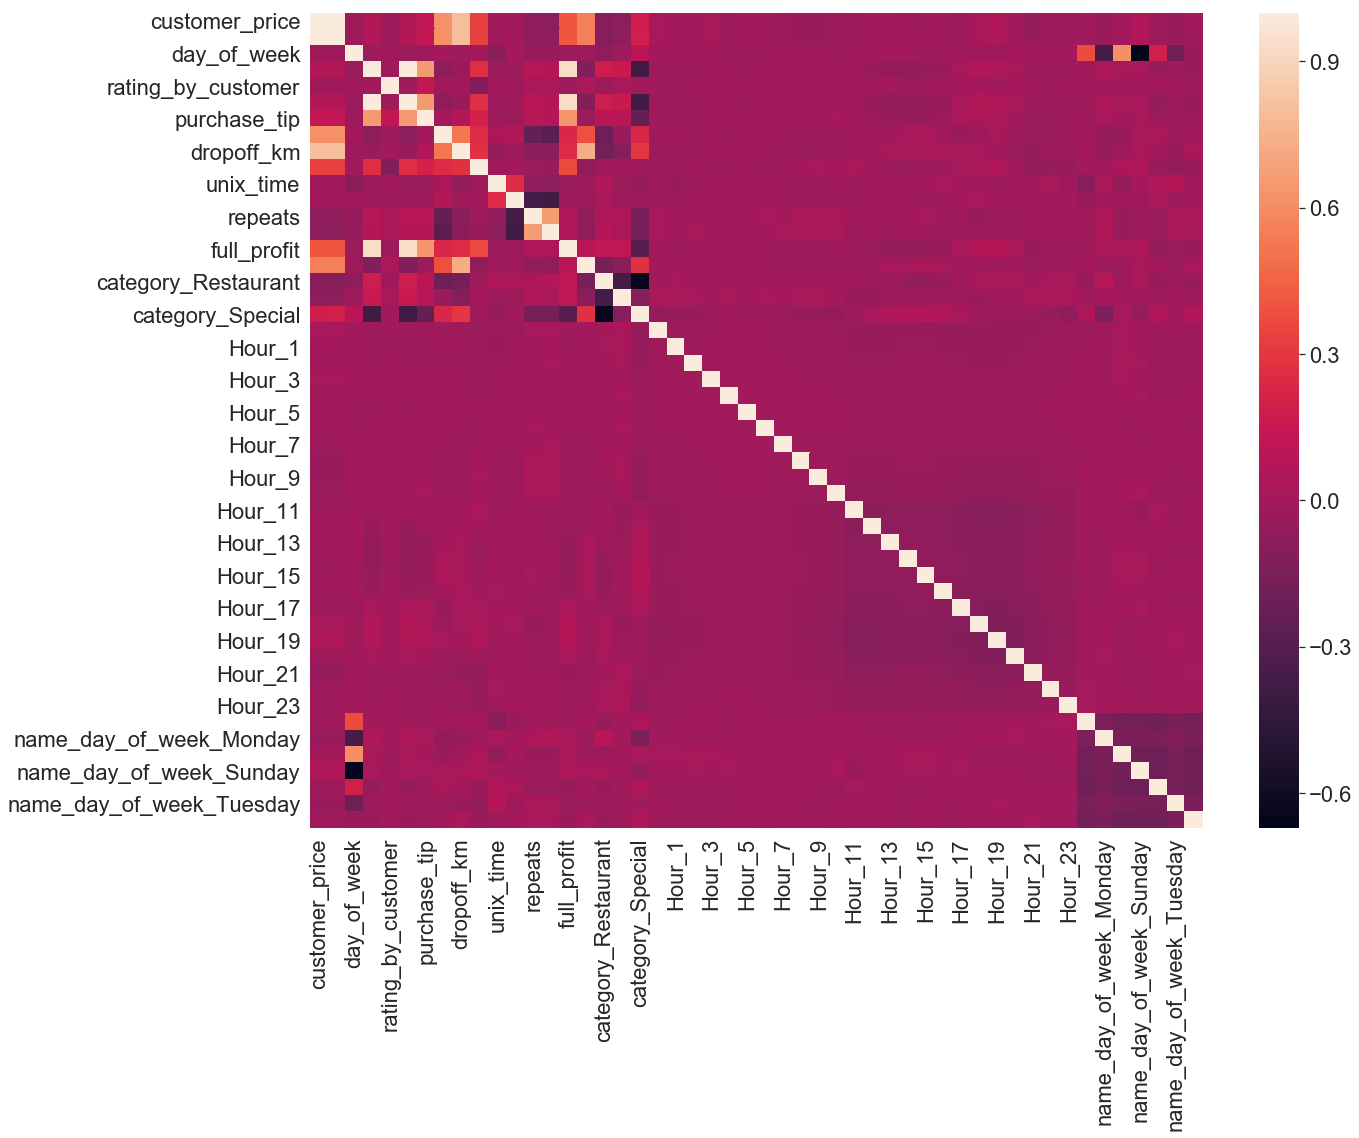

In [62]:
plt.tight_layout()
plt.subplots(figsize=(20,15))
sns.heatmap(df_m_cat2.corr())

In [63]:
df_m_cat2.head().T

,0,1,2,3,4
market,Chicago,Chicago,Chicago,Chicago,Chicago
job_date_local_time,4/1/15 0:07,4/1/15 0:12,4/1/15 0:16,4/1/15 0:17,4/1/15 0:24
customer_price,5,7.5,10.75,6,8
courier_price,4,6,8.6,4.8,6.4
customer_uuid,180DB394-92B1-48FA-A41B-032E2D7705F7,8225C4A7-41F3-41D2-BEAE-03322440CD06,A57C5927-F608-44FA-B466-E5878454BD31,6551598E-8771-43A3-97E3-18F1EC473D63,534ECE59-A2BC-4572-8286-91B25D2A2147
courier_uuid,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,52639991-2e87-4ad6-a903-ede7d00afbc9,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0
job_uuid,7ee723fe-7557-42c0-bdd6-691bac632536,9fc78f6f-66e5-4378-81d6-87b93bfed891,1674079d-2a23-4c2f-8aab-ddb274fce53e,17fbcc32-0f03-4af8-b46d-04e8b888e083,e9800b17-936a-4b42-9ed4-cdc8f2c0db77
day_of_week,3,3,3,3,3
purchase_fee,1.09,1.36,2.89,3.79,1.65
rating_by_customer,5,5,5,5,5


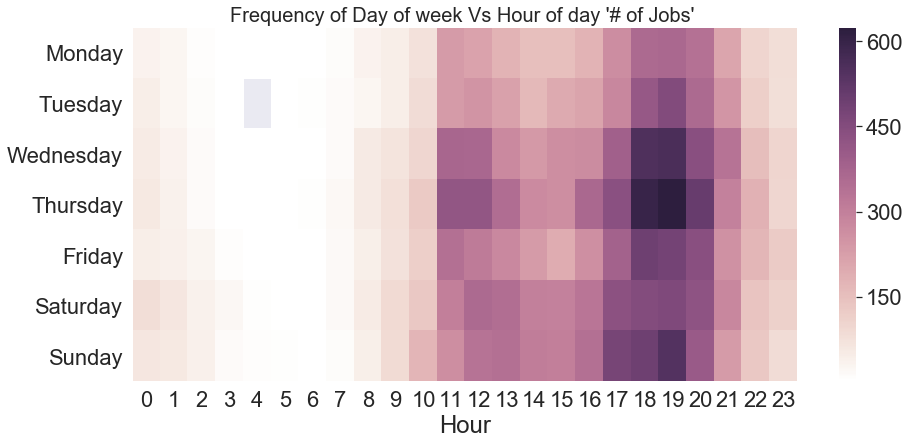

In [64]:
#grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
#grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

grouped_df = df_m_cat.groupby(["name_day_of_week","Hour",])["job_uuid"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot("name_day_of_week","Hour","job_uuid")

grouped_df.index = pd.CategoricalIndex(grouped_df.index, categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
grouped_df.sort_index(level=0, inplace=True)

plt.figure(figsize=(14,6.5))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(grouped_df,cmap = cmap,)
plt.ylabel('') 
plt.tight_layout()
sns.set(font_scale=2)
plt.title("Frequency of Day of week Vs Hour of day '# of Jobs' ",fontsize=20)
plt.show()


In [65]:
df_m_cat_4t = df_m_cat[df_m_cat['Hour']== 4]

##df_m_cat_4t.info()
df_m_cat_4t.groupby("day_of_week")['job_uuid'].count()

day_of_week
0    9
1    2
3    2
4    1
5    1
6    6
Name: job_uuid, dtype: int64

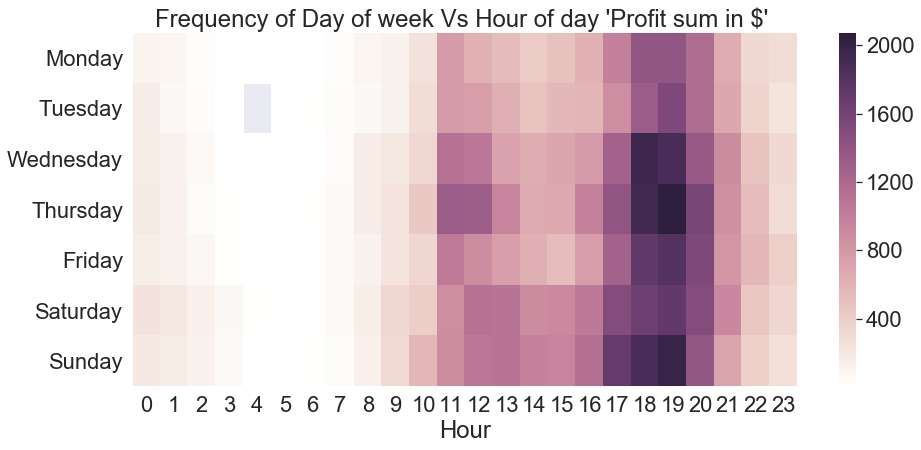

In [66]:
grouped_df = df_m_cat.groupby(["name_day_of_week","Hour",])["full_profit"].aggregate("sum").reset_index()
grouped_df = grouped_df.pivot("name_day_of_week","Hour","full_profit")

grouped_df.index = pd.CategoricalIndex(grouped_df.index, categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
grouped_df.sort_index(level=0, inplace=True)

plt.figure(figsize=(14,6.5))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(grouped_df,cmap = cmap)
plt.ylabel('')
plt.tight_layout()
sns.set(font_scale=2)
plt.title("Frequency of Day of week Vs Hour of day 'Profit sum in $' ")
plt.show()

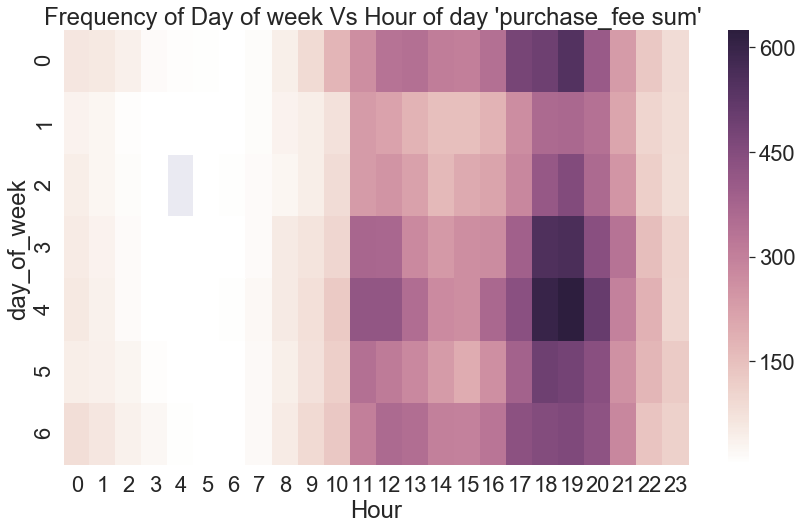

In [67]:
grouped_df = df_m_cat.groupby(["day_of_week","Hour",])["purchase_fee"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot("day_of_week","Hour",'purchase_fee')


plt.figure(figsize=(14,8))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(grouped_df,cmap = cmap)

plt.title("Frequency of Day of week Vs Hour of day 'purchase_fee sum' ")
plt.show()

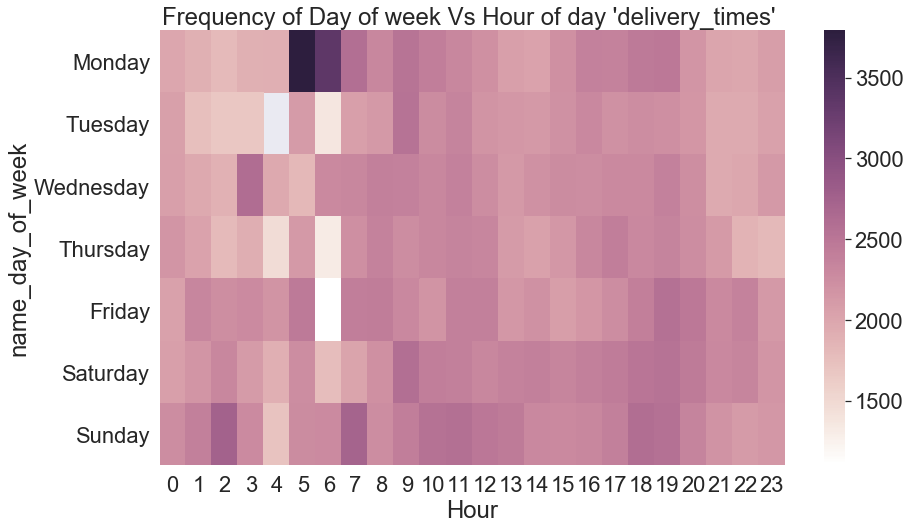

In [68]:
# for fun delivery times

grouped_df = df_m_cat.groupby(["name_day_of_week","Hour"])["total_delivery_time"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot("name_day_of_week","Hour",'total_delivery_time')

grouped_df.index = pd.CategoricalIndex(grouped_df.index, categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
grouped_df.sort_index(level=0, inplace=True)


plt.figure(figsize=(14,8))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(grouped_df,cmap = cmap)

plt.title("Frequency of Day of week Vs Hour of day 'delivery_times' ")
plt.show()

### This area is for the times separated stuff 

https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart

https://stackoverflow.com/questions/40804265/how-to-calculate-time-difference-by-group-using-pandas

Figure out how many times a customer makes separate orders whats the average times a customer uses Postmates a month?

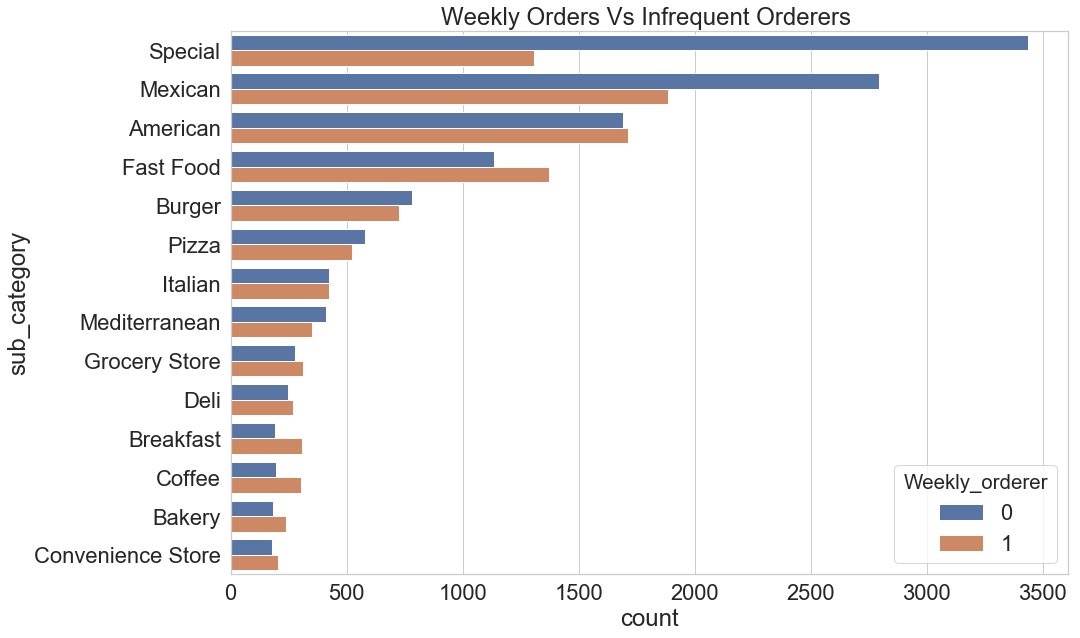

In [69]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.set(style="whitegrid",font_scale=2)
plt.title("Weekly Orders Vs Infrequent Orderers ")
ax = sns.countplot(y="sub_category", hue="Weekly_orderer", data=df_m_cat,order = df_m_cat['sub_category'].value_counts().iloc[:14].index)


In [70]:
df_weekly_orderers_rating_count=df_m_cat.groupby(['sub_category','Weekly_orderer'])['rating_by_customer'].count().to_frame().reset_index()

In [71]:
df_weekly_orderers_rating_mean= df_m_cat.groupby(['sub_category','Weekly_orderer'])['rating_by_customer'].mean().to_frame().reset_index()

In [72]:
df_weekly_orderers_delivery_mean= df_m_cat.groupby(['sub_category','Weekly_orderer'])['total_delivery_time'].mean().to_frame().reset_index()

In [73]:
df_weekly_orderers_delivery_mean.head()

,sub_category,Weekly_orderer,total_delivery_time
0,Alcohol,0,2173.703704
1,Alcohol,1,1883.267606
2,American,0,2474.965701
3,American,1,2409.351809
4,Asian,0,2461.590909


In [74]:
df_weekly_orderers3 = pd.merge(df_weekly_orderers_rating_count,df_weekly_orderers_rating_mean, on=['sub_category','Weekly_orderer'])

In [75]:
df_weekly_orderers3=df_weekly_orderers3.rename(columns={'rating_by_customer_x':'sum_of_jobs','rating_by_customer_y':'rating_by_customer'})

In [76]:
df_weekly_orderers3.sort_values('sum_of_jobs',ascending=False).head(10)

,sub_category,Weekly_orderer,sum_of_jobs,rating_by_customer
96,Special,0,3204,4.811486
70,Mexican,0,2545,4.742633
71,Mexican,1,1840,4.808696
3,American,1,1690,4.811243
2,American,0,1572,4.760814
38,Fast Food,1,1342,4.825633
97,Special,1,1292,4.854489
37,Fast Food,0,1075,4.797209
15,Burger,0,728,4.798077
16,Burger,1,712,4.790730


In [77]:
df_weekly_orderers4 = pd.merge(df_weekly_orderers3,df_weekly_orderers_delivery_mean, on=['sub_category','Weekly_orderer'])

In [78]:
df_weekly_orderers4.sort_values('sum_of_jobs',ascending=False).head(10)

,sub_category,Weekly_orderer,sum_of_jobs,rating_by_customer,total_delivery_time
96,Special,0,3204,4.811486,2305.969732
70,Mexican,0,2545,4.742633,2125.669889
71,Mexican,1,1840,4.808696,1978.586207
3,American,1,1690,4.811243,2409.351809
2,American,0,1572,4.760814,2474.965701
38,Fast Food,1,1342,4.825633,1978.884195
97,Special,1,1292,4.854489,2267.453364
37,Fast Food,0,1075,4.797209,2072.875000
15,Burger,0,728,4.798077,2517.135377
16,Burger,1,712,4.790730,2454.000000


# The Combined Markets Analysis

______________________________

## Markets Overall

In [79]:
#create a dataframe of dates with the sum of actions
df_jobs = df_m_cat.groupby('Date')['job_uuid'].nunique().to_frame()

In [80]:
#reset the index so date is a column rather than an index
df_jobs.reset_index(level=0, inplace=True)

In [81]:
#name the days of the week for better visability
df_jobs['name_day_of_week'] = df_jobs['Date'].dt.day_name()

[Text(735689.0, 0, '2015-04-01'),
 Text(735693.0, 0, '2015-04-05'),
 Text(735697.0, 0, '2015-04-09'),
 Text(735701.0, 0, '2015-04-13'),
 Text(735705.0, 0, '2015-04-17'),
 Text(735709.0, 0, '2015-04-21'),
 Text(735713.0, 0, '2015-04-25'),
 Text(735717.0, 0, '2015-04-29'),
 Text(735719.0, 0, '2015-05-01')]

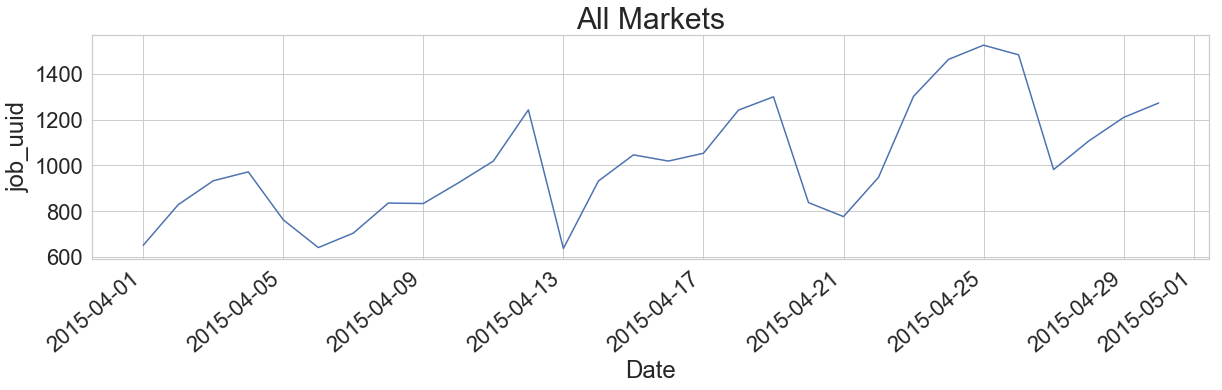

In [82]:
#ax = sns.lineplot(x="timepoint", y="signal", data=df_jobs)


plt.subplots(figsize=(18,5))
#plt.tight_layout()
plt.title("All Markets",fontsize=30)
ax = sns.lineplot(x="Date", y="job_uuid", data=df_jobs)
sns.set(style="whitegrid",font_scale=2)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [83]:
#df_jobs.head()
df_jobs.groupby('name_day_of_week')['job_uuid'].mean().sort_values()

name_day_of_week
Monday        775.0
Tuesday       880.0
Wednesday     938.2
Thursday     1051.0
Friday       1093.0
Saturday     1189.0
Sunday       1196.5
Name: job_uuid, dtype: float64

## Chicago Analysis

In [84]:
#chicago sales per weekday
df_chicago = df_m_cat[df_m_cat['market_Chicago']==1].groupby('Date')['job_uuid'].nunique().to_frame()

In [85]:
df_chicago.reset_index(level=0, inplace=True)
df_chicago['Date'] = pd.to_datetime(df_chicago['Date'], errors='coerce')
df_chicago['name_day_of_week'] = df_chicago['Date'].dt.day_name()

In [86]:
df_chicago.head()

,Date,job_uuid,name_day_of_week
0,2015-04-01,470,Wednesday
1,2015-04-02,585,Thursday
2,2015-04-03,701,Friday
3,2015-04-04,719,Saturday
4,2015-04-05,553,Sunday


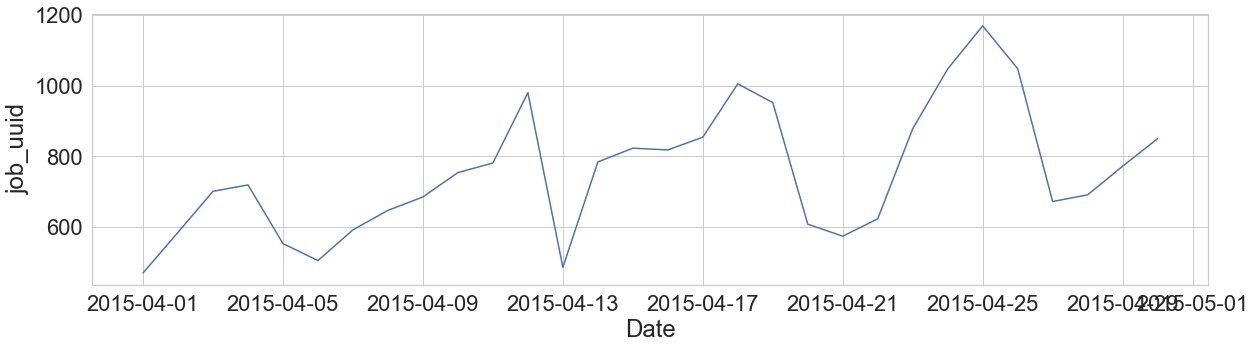

In [87]:
plt.subplots(figsize=(20,5))
ax = sns.lineplot(x="Date", y="job_uuid", data=df_chicago)

In [88]:
df_chicago.groupby('name_day_of_week')['job_uuid'].mean().sort_values()

name_day_of_week
Monday       567.75
Tuesday      660.25
Wednesday    667.00
Thursday     763.20
Friday       839.00
Sunday       883.25
Saturday     918.50
Name: job_uuid, dtype: float64

## Phoenix Analysis

In [89]:
#for Phoenix
df_phoenix = df_m_cat[df_m_cat['market_Phoenix']==1].groupby('Date')['job_uuid'].nunique().to_frame()
df_phoenix.reset_index(level=0, inplace=True)
df_phoenix['Date'] = pd.to_datetime(df_phoenix['Date'], errors='coerce')
df_phoenix['name_day_of_week'] = df_phoenix['Date'].dt.day_name()

In [90]:
df_phoenix.head()

,Date,job_uuid,name_day_of_week
0,2015-04-01,182,Wednesday
1,2015-04-02,243,Thursday
2,2015-04-03,231,Friday
3,2015-04-04,252,Saturday
4,2015-04-05,210,Sunday


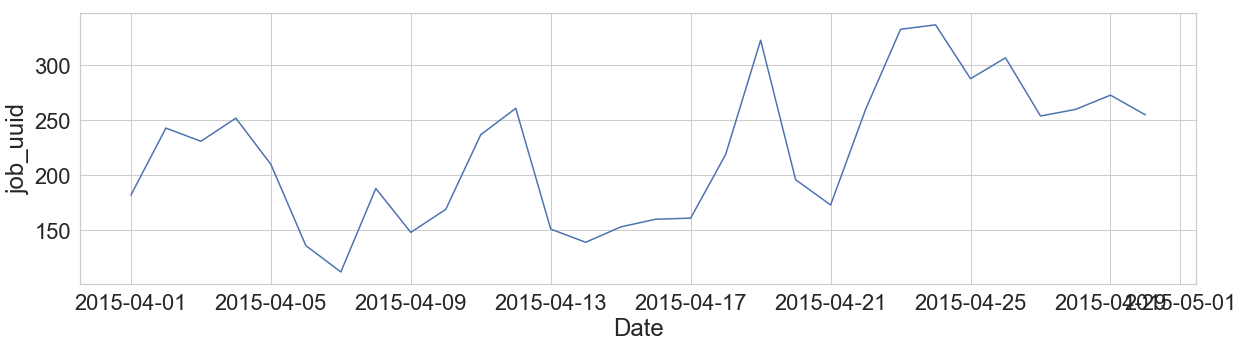

In [91]:
plt.subplots(figsize=(20,5))
ax = sns.lineplot(x="Date", y="job_uuid", data=df_phoenix)

In [92]:
df_phoenix.groupby('name_day_of_week')['job_uuid'].mean().sort_values()

name_day_of_week
Tuesday      171.00
Monday       184.25
Wednesday    211.20
Friday       224.50
Thursday     227.80
Saturday     249.00
Sunday       275.25
Name: job_uuid, dtype: float64

## San Antonio Analysis

In [93]:

df_sa = df_m_cat[df_m_cat['market_San Antonio']==1].groupby('Date')['job_uuid'].nunique().to_frame()
df_sa.reset_index(level=0, inplace=True)
df_sa['Date'] = pd.to_datetime(df_sa['Date'], errors='coerce')
df_sa['name_day_of_week'] = df_sa['Date'].dt.day_name()

In [94]:
df_sa.head()

,Date,job_uuid,name_day_of_week
0,2015-04-02,1,Thursday
1,2015-04-03,1,Friday
2,2015-04-04,1,Saturday
3,2015-04-06,1,Monday
4,2015-04-07,1,Tuesday


[Text(735689.0, 0, '2015-04-01'),
 Text(735693.0, 0, '2015-04-05'),
 Text(735697.0, 0, '2015-04-09'),
 Text(735701.0, 0, '2015-04-13'),
 Text(735705.0, 0, '2015-04-17'),
 Text(735709.0, 0, '2015-04-21'),
 Text(735713.0, 0, '2015-04-25'),
 Text(735717.0, 0, '2015-04-29'),
 Text(735719.0, 0, '2015-05-01')]

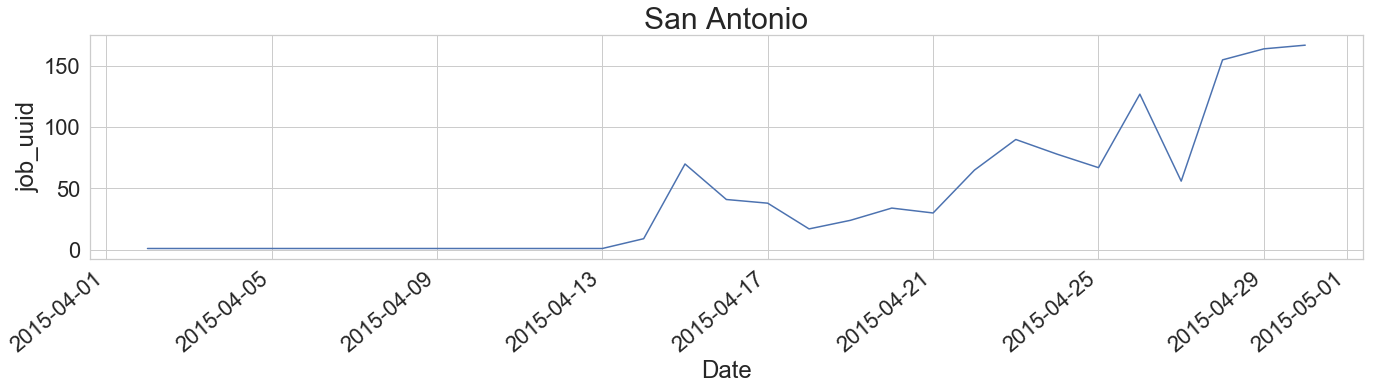

In [98]:
plt.subplots(figsize=(20,5))
plt.title("San Antonio",fontsize=30)
ax = sns.lineplot(x="Date", y="job_uuid", data=df_sa)
sns.set(style="whitegrid",font_scale=2)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [96]:
df_sa.groupby('name_day_of_week')['job_uuid'].mean().sort_values()

name_day_of_week
Saturday     21.500000
Monday       23.000000
Friday       29.500000
Tuesday      48.750000
Sunday       50.666667
Thursday     60.000000
Wednesday    75.000000
Name: job_uuid, dtype: float64

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


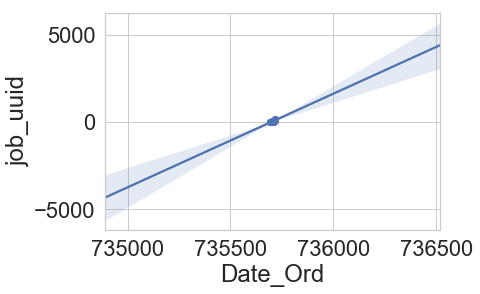

In [97]:
from matplotlib.dates import date2num

df_sa['Date_Ord'] = df_sa['Date'].map(lambda a: date2num(a))

ax = sns.regplot('Date_Ord', "job_uuid", data=df_sa)